In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
from covidpredictions.DecisionTree import DecisionTree

# Data location

In [4]:
data_path = "../data/clean_data.csv"
save_directory = "current_accuracies/decision_tree/decision_tree_saves"

# Load data

In [5]:
data = pd.read_csv(data_path)

In [6]:
data

,id,Nom du centre,age,Sexe,Lieu de provenance du patient,Echographiste,Tabagisme actif,BPCO,Asthme,Autre antecedent respiratoire,...,Zone posterieure droite bas,Zone posterieure gauche haut,Zone posterieure gauche bas,Oxygenotherapie,Outcome J28,Death,Back home,Hospitalization,Intensive care unit,Intensive care unit & death
0,1,0,91,1,0,0,0,0,0,0,...,2,2,2,3,0,1,0,0,0,0
1,109,1,45,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,46,2,76,0,1,1,0,0,0,0,...,2,1,2,2,2,0,0,1,0,2
3,247,1,55,0,2,1,1,0,0,0,...,0,0,0,3,1,0,1,0,0,1
4,195,1,42,0,0,1,0,0,0,0,...,0,0,0,3,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,218,0,34,1,0,0,1,0,0,0,...,0,0,0,3,1,0,1,0,0,1
258,199,2,58,0,0,1,0,0,0,0,...,1,0,1,2,2,0,0,1,0,2
259,117,0,45,0,0,2,0,0,0,0,...,0,0,0,3,1,0,1,0,0,1
260,201,0,46,0,0,2,0,0,0,0,...,0,0,0,3,1,0,1,0,0,1


In [7]:
data.shape

(262, 43)

In [8]:
(data.columns)

Index(['id', 'Nom du centre', 'age', 'Sexe', 'Lieu de provenance du patient',
       'Echographiste', 'Tabagisme actif', 'BPCO', 'Asthme',
       'Autre antecedent respiratoire', 'Hypertension arterielle',
       'Cardiopathie ischemique', 'Cardiopathie rythmique',
       'Diabete de type 1', 'Diabete de type 2', 'Diabetes',
       'Cancer  hemopathie maligne', 'Demence', 'Statut immunodeprime',
       'AINS au long cours (dans le cadre d'une pathologie suivie)',
       'AINS ponctuel recent (cadre des symptomatologies COVID-19 suspect avere)',
       'Tension arterielle systolique (mmHg)',
       'Tension arterielle diastolique (mmHg)',
       'Frequence cardiaque (puls. min)', 'Frequence respiratoire (resp. min)',
       'Temperature (Celsius)', 'Confusion', 'Saturation O2',
       'Zone anterieure droite haut', 'Zone anterieure droite bas',
       'Zone anterieure gauche haut', 'Zone anterieure gauche bas',
       'Zone posterieure droite haut', 'Zone posterieure droite bas',
      

In [9]:
data.iloc[:, 1: -6].columns

Index(['Nom du centre', 'age', 'Sexe', 'Lieu de provenance du patient',
       'Echographiste', 'Tabagisme actif', 'BPCO', 'Asthme',
       'Autre antecedent respiratoire', 'Hypertension arterielle',
       'Cardiopathie ischemique', 'Cardiopathie rythmique',
       'Diabete de type 1', 'Diabete de type 2', 'Diabetes',
       'Cancer  hemopathie maligne', 'Demence', 'Statut immunodeprime',
       'AINS au long cours (dans le cadre d'une pathologie suivie)',
       'AINS ponctuel recent (cadre des symptomatologies COVID-19 suspect avere)',
       'Tension arterielle systolique (mmHg)',
       'Tension arterielle diastolique (mmHg)',
       'Frequence cardiaque (puls. min)', 'Frequence respiratoire (resp. min)',
       'Temperature (Celsius)', 'Confusion', 'Saturation O2',
       'Zone anterieure droite haut', 'Zone anterieure droite bas',
       'Zone anterieure gauche haut', 'Zone anterieure gauche bas',
       'Zone posterieure droite haut', 'Zone posterieure droite bas',
       'Zone

In [10]:
data.iloc[:, -6:].columns

Index(['Outcome J28', 'Death', 'Back home', 'Hospitalization',
       'Intensive care unit', 'Intensive care unit & death'],
      dtype='object')

In [11]:
print(data.iloc[:, 1: -6].shape[1], data.iloc[:, -6: -5].shape[1])

36 1


# Split data set into train, validation and test

In [12]:
def split_dataset(data, label, nb_categories):
    Y_res_train = []
    X_res_train = []
    Y_res_test = []
    X_res_test = []

    for i in range(nb_categories):
        if label == -1:
            Y = data[data[:, label] == i, label:]
        else:
            Y = data[data[:, label] == i, label:(label + 1)]
        X = data[data[:, label] == i, 1:-6]

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)

        Y_res_train.append(Y_train)
        X_res_train.append(X_train)
        Y_res_test.append(Y_test)
        X_res_test.append(X_test)

    Y_train = np.concatenate(Y_res_train, axis=0)
    X_train = np.concatenate(X_res_train, axis=0)
    Y_test = np.concatenate(Y_res_test, axis=0)
    X_test = np.concatenate(X_res_test, axis=0)
    
    return X_train, X_test, Y_train, Y_test

In [13]:
data = np.loadtxt(data_path, delimiter=",",dtype=float, skiprows=1)
col_names = np.genfromtxt(data_path , delimiter=',', names=True, dtype=float).dtype.names

x_col_names = col_names[1:-6]
y_col_names = col_names[-6:]

X = data[:, 1:-6]
Y = data[:, -6:]

X_train, X_test, Y_train, Y_test = split_dataset(data, -7, 4)

print(Y.shape)
print(X.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(262, 6)
(262, 36)
(156, 36)
(156, 1)
(106, 36)
(106, 1)


In [14]:
print(len(x_col_names))
print(len(y_col_names))

36
6


# Depth

In [15]:
DEPTH=7

# Train and test

In [16]:
y_col_names

('Outcome_J28',
 'Death',
 'Back_home',
 'Hospitalization',
 'Intensive_care_unit',
 'Intensive_care_unit__death')

          Outcome_J28           

[0. 1. 2. 3.]
 Decision tree fit and display  
|--- Saturation_O2 <= 94.0 
|---|--- age <= 50.0 value 1.0
|---|---|--- age <= 83.0 else  0.0
|---|---|---|--- Frequence_respiratoire_resp_min <= 35.0 value 2.0 else 0.0
|---|--- Oxygenotherapie <= 2.0 
|---|---|--- Sexe = 0.0 else  2.0
|---|---|---|--- Frequence_cardiaque_puls_min <= 94.0 else  2.0
|---|---|---|---|--- Frequence_cardiaque_puls_min <= 81.0 value 2.0 else 1.0
|---|---|--- Statut_immunodeprime = 0.0 
|---|---|---|--- Nom_du_centre <= 5.0 else  2.0
|---|---|---|---|--- Zone_posterieure_gauche_haut <= 1.0 else  3.0
|---|---|---|---|---|--- Tension_arterielle_diastolique_mmHg <= 93.0 value 1.0
|---|---|---|---|---|---|--- Temperature_Celsius <= 37.0 else  1.0
|---|---|---|---|---|---|---|--- age <= 43.0 value 1.0 else 2.0
|---|---|---|--- Nom_du_centre <= 2.0 value 2.0 else 0.0

              Test              
accuracy ==> 0.7663551401869159


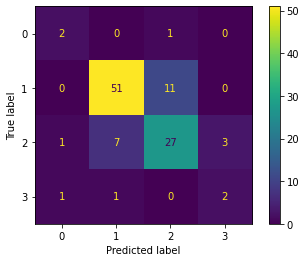





             Death              

[0. 1.]
 Decision tree fit and display  
|--- Frequence_respiratoire_resp_min <= 30.0 
|---|--- Saturation_O2 <= 89.0 else  0.0
|---|---|--- Nom_du_centre <= 4.0 value 0.0 else 1.0
|---|--- Zone_anterieure_droite_haut <= 1.0 value 0.0
|---|---|--- Nom_du_centre <= 5.0 value 1.0 else 0.0

              Test              
accuracy ==> 0.9905660377358491


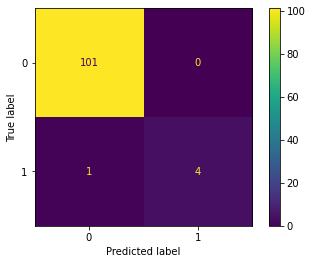





           Back_home            

[0. 1.]
 Decision tree fit and display  
|--- Zone_posterieure_gauche_bas <= 1.0 
|---|--- Zone_anterieure_droite_haut <= 1.0 
|---|---|--- Oxygenotherapie <= 2.0 
|---|---|---|--- age <= 53.0 value 1.0
|---|---|---|---|--- age <= 81.0 value 0.0
|---|---|---|---|---|--- age = 84.0 value 1.0 else 0.0
|---|---|---|--- Nom_du_centre <= 4.0 value 1.0
|---|---|---|---|--- Tension_arterielle_systolique_mmHg <= 133.0 value 0.0 else 1.0
|---|---|--- Sexe = 0.0 else  0.0
|---|---|---|--- Frequence_respiratoire_resp_min <= 24.0 value 0.0 else 1.0
|---|--- age <= 55.0 else  0.0
|---|---|--- Frequence_respiratoire_resp_min <= 22.0 value 1.0 else 0.0

              Test              
accuracy ==> 0.8867924528301887


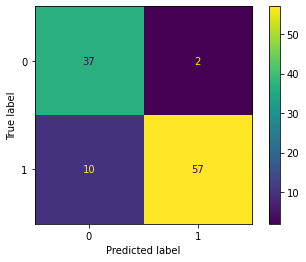





        Hospitalization         

[0. 1.]
 Decision tree fit and display  
|--- Oxygenotherapie <= 2.0 
|---|--- Zone_posterieure_gauche_bas <= 1.0 
|---|---|--- Frequence_cardiaque_puls_min <= 97.0 else  1.0
|---|---|---|--- Diabete_de_type_2 = 0.0 else  1.0
|---|---|---|---|--- Nom_du_centre <= 1.0 value 0.0
|---|---|---|---|---|--- age <= 61.0 value 1.0 else 0.0
|---|---|--- Saturation_O2 <= 82.0 else  1.0
|---|---|---|--- Nom_du_centre = 0.0 value 1.0 else 0.0
|---|--- age <= 56.0 
|---|---|--- Tension_arterielle_diastolique_mmHg <= 93.0 value 0.0
|---|---|---|--- Zone_anterieure_gauche_haut = 0.0 value 0.0 else 1.0
|---|---|--- Tension_arterielle_systolique_mmHg <= 113.0 value 1.0
|---|---|---|--- Frequence_respiratoire_resp_min <= 25.0 else  0.0
|---|---|---|---|--- Zone_posterieure_droite_bas <= 1.0 else  1.0
|---|---|---|---|---|--- Sexe = 0.0 value 0.0
|---|---|---|---|---|---|--- Echographiste <= 1.0 value 1.0 else 0.0

              Test              
accuracy ==> 0.8207

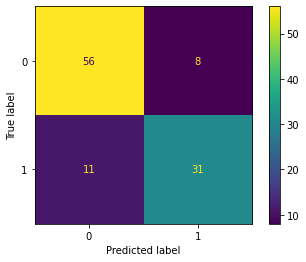





      Intensive_care_unit       

[0. 1.]
 Decision tree fit and display  
|--- Zone_anterieure_gauche_haut <= 1.0 value 0.0
|---|--- Zone_anterieure_gauche_bas <= 1.0 
|---|---|--- age <= 73.0 value 1.0 else 0.0
|---|---|--- Temperature_Celsius <= 36.8 else  0.0
|---|---|---|--- Nom_du_centre = 0.0 value 0.0 else 1.0

              Test              
accuracy ==> 0.9528301886792453


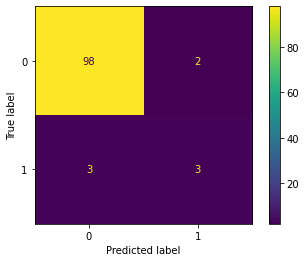





   Intensive_care_unit__death   

[0.]
 Decision tree fit and display  
|--- value 0.0

              Test              
accuracy ==> 1.0


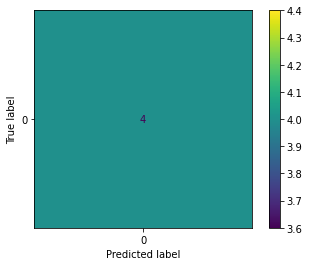





 Mean accuracy of all labels :   0.9028830894022218


In [17]:
total_accuracy = 0
decision_trees = []
for i, column in enumerate(y_col_names):
    print("\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    i = i - 6
    
    if i == -1:
        nb_categories = 1
    elif i == -6:
        nb_categories = 4
    else:
        nb_categories = 2

    X_train, X_test, Y_train, Y_test = split_dataset(data, i, nb_categories)
    
    print(np.unique(Y_test))
    print("\x1b[6;30;43m", "Decision tree fit and display".center(30), "\x1b[0m")
    decision_tree = DecisionTree(max_depth=DEPTH)
    decision_tree.fit(X_train, Y_train, x_col_names=x_col_names)
    decision_tree.pretty_print()
    decision_tree.save_tree(os.path.join(save_directory, f'decision_tree_{column}'))
    decision_trees.append(decision_tree)
    
    print("\n\x1b[6;30;43m", "Test".center(30),"\x1b[0m")
    
    total_accuracy += decision_tree.prediction_analyse(X_test, Y_test)
    print("\n\n\n")

print("\x1b[6;30;42m", "Mean accuracy of all labels :".center(30), "\x1b[0m", total_accuracy / len(y_col_names))

In [18]:
y_col_names

('Outcome_J28',
 'Death',
 'Back_home',
 'Hospitalization',
 'Intensive_care_unit',
 'Intensive_care_unit__death')

# Evaluation on one human

In [24]:
preds = []
for i, column in enumerate(y_col_names):
    i = i - 7
    if i == -1:
        nb_categories = 3
    elif i == -7:
        nb_categories = 4
    elif i == -6:
        continue
    else:
        nb_categories = 2

    X_train, X_test, Y_train, Y_test = split_dataset(data, i, nb_categories)
   
    print("\n\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    i = i + 6
    #if i >= 1:
    #    i = i-1
    
    _, pred = decision_trees[i].predict_one_element(X_test[2], display_evaluation_flow=True)
    label = Y_test[2]
    
    if i == 0:
        out = pred
    elif i == 5:
        low_classes = pred
    else:
        preds.append(pred)

trees = np.argmax(preds)
print('preds', preds, ", pred outcome : ", out, ", pred trees : ", trees, "low_classes : ", low_classes)

if out == trees:
    if out == 0 and low_classes == 0:
        definitive = out
else:
    if trees == 0 and low_classes == trees:
        definitive = trees
    elif (trees == 1 or trees == 2) and low_classes == 1:
        definitive = trees
    elif trees == 3 and low_classes == 2:
        definitive = trees
    else:
        definitive = out
        

print("definitive prediction", definitive, "label : ", label)



          Outcome_J28           

Saturation_O2 : 96.0 > 94.0
Oxygenotherapie : 0.0 <= 2.0
Sexe : 0.0 = 0.0
Frequence_cardiaque_puls_min : 86.0 <= 94.0
Frequence_cardiaque_puls_min : 86.0 > 81.0
Frequence_respiratoire_resp_min : 21.0 <= 30.0
Saturation_O2 : 96.0 > 89.0
Zone_posterieure_gauche_bas : 1.0 <= 1.0
Zone_anterieure_droite_haut : 1.0 <= 1.0
Oxygenotherapie : 2.0 <= 2.0
age : 83.0 > 53.0
age : 83.0 > 81.0
age : 83.0 = 84.0
Oxygenotherapie : 3.0 > 2.0
age : 41.0 <= 56.0
Tension_arterielle_diastolique_mmHg : 70.0 <= 93.0
Zone_anterieure_gauche_haut : 2.0 > 1.0
Zone_anterieure_gauche_bas : 2.0 > 1.0
Temperature_Celsius : 37.2 > 36.8
Frequence_respiratoire_resp_min : 21.0 <= 30.0
Saturation_O2 : 96.0 > 89.0
Zone_posterieure_gauche_bas : 1.0 <= 1.0
Zone_anterieure_droite_haut : 1.0 <= 1.0
Oxygenotherapie : 2.0 <= 2.0
age : 83.0 > 53.0
age : 83.0 > 81.0
age : 83.0 = 84.0
Oxygenotherapie : 3.0 > 2.0
age : 41.0 <= 56.0
Tension_arterielle_diastolique_mmHg : 70.0 <= 93.0
Zone_anterieure

NameError: name 'out' is not defined

# Get all predictions

In [ ]:
total_acc = 0
all_preds = []
all_labels = []
for patient in range(len(X_test)):
    preds = []
    for i, column in enumerate(y_col_names):
        i = i - 6
        if i == -1:
            nb_categories = 3
        elif i == -6:
            nb_categories = 4
        else:
            nb_categories = 2

        #print("i ::", i , nb_categories)
        X_train, X_test, Y_train, Y_test = split_dataset(data, i, nb_categories)
        _, pred = decision_trees[i].predict_one_element(X_test[patient], display_evaluation_flow=False)
        label = Y_test[patient]

        if i == -6:
            out = pred
        elif i == -1:
            low_classes = pred
        else:
            preds.append(pred)

    trees = np.argmax(preds)

    if out == trees:
        definitive = out
    else:
        if trees == 0 and low_classes == trees:
            definitive = trees
        elif (trees == 1 or trees == 2) and low_classes == 1:
            definitive = trees
        elif trees == 3 and low_classes == 2:
            definitive = trees
        else:
            definitive = out

    all_labels.append(label)
    all_preds.append(definitive)
    
cm = confusion_matrix(all_preds, all_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(all_preds, all_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(all_preds, all_labels, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(all_preds, all_labels, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(all_preds, all_labels, average='weighted')
print('F1 score: %f' % f1)

# Predict and make submission

## Load tests

In [ ]:
test_path = "../data/clean_test_data.csv"

In [ ]:
df_test = np.loadtxt(test_path, delimiter=",",dtype=float, skiprows=1)

In [ ]:
print(df_test.shape)
df_test

In [ ]:
res = pd.DataFrame(data=df_test[:, 0], columns=["id"])
res["id"] = res["id"].astype(int)
print(df_test.shape)
res

In [ ]:
X = df_test[:, 1:]

In [ ]:
all_preds = []
for patient in range(len(X)):
    preds = []
    for i, column in enumerate(y_col_names):
        i = i - 6
        if i == -1:
            Y = data[:, i:]
        else:
            Y = data[:, i:(i+1)]
        X = data[:, 1:-6]

        _, pred = decision_trees[i].predict_one_element(X[patient], display_evaluation_flow=False)

        if i == -6:
            out = pred
        elif i == -1:
            low_classes = pred
        else:
            preds.append(pred)

    trees = np.argmax(preds)
    
    if out == trees:
        definitive = out
    else:
        if trees == 0 and low_classes == trees:
            definitive = trees
        elif (trees == 1 or trees == 2) and low_classes == 1:
            definitive = trees
        elif trees == 3 and low_classes == 2:
            definitive = trees
        else:
            definitive = out

    all_preds.append(definitive)

In [ ]:
res['prediction'] = all_preds
res['prediction'].replace({0 : "Death", 1 : "Back home", 2 : 'Hospitalization', 3 : 'Intensive care unit'}, inplace=True)

In [ ]:
res.to_csv("../prediction_decision_tree_separated.csv", sep=";", index=False)

In [ ]:
res